# Question 5

In [ ]:
import numpy as np

In [ ]:
# train data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 0, 1])

In [ ]:
# layer sizes
input_size = 2
hidden_size = 4
output_size = 1

# initialize weights and biases randomly
input_weights = np.random.rand(input_size, hidden_size)
hidden_weights = np.random.rand(hidden_size, output_size)
hidden_bias = np.random.rand(1, hidden_size)
output_bias = np.random.rand(1, output_size)

In [ ]:
# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of the sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# learning rate
learning_rate = 0.1

# training loop
for epoch in range(10000):
    # forward propagation
    hidden_layer_output = sigmoid(np.dot(x, input_weights) + hidden_bias)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, hidden_weights) + output_bias)

    # loss
    loss = y.reshape(-1, 1) - output_layer_output

    # backpropagation
    d_output = loss * sigmoid_derivative(output_layer_output)
    loss_hidden = d_output.dot(hidden_weights.T)
    d_hidden = loss_hidden * sigmoid_derivative(hidden_layer_output)

    # update weights and biases
    input_weights += x.T.dot(d_hidden) * learning_rate
    hidden_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
    output_bias += np.sum(d_output, axis=0, keepdims=True) * learning_rate

In [ ]:
# output of the model
print("Output after training:")
print(output_layer_output)
print((output_layer_output >= 0.5).astype(int))

Output after training:
[[0.88075637]
 [0.90527272]
 [0.8986639 ]
 [0.91727611]]
[[1]
 [1]
 [1]
 [1]]


# Question 6

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# load the MNIST dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# preprocess the data
train_x = train_x / 255.0
test_x = test_x / 255.0

In [ ]:
# MLP model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(train_x, train_y, epochs=10, batch_size=64, validation_split=0.15)

Epoch 1/10
797/797 [==============================] - 4s 4ms/step - loss: 0.4465 - accuracy: 0.8772 - val_loss: 0.2422 - val_accuracy: 0.9308
Epoch 2/10
797/797 [==============================] - 2s 3ms/step - loss: 0.2430 - accuracy: 0.9319 - val_loss: 0.1979 - val_accuracy: 0.9452
Epoch 3/10
797/797 [==============================] - 3s 3ms/step - loss: 0.1988 - accuracy: 0.9428 - val_loss: 0.1726 - val_accuracy: 0.9523
Epoch 4/10
797/797 [==============================] - 3s 4ms/step - loss: 0.1686 - accuracy: 0.9517 - val_loss: 0.1543 - val_accuracy: 0.9552
Epoch 5/10
797/797 [==============================] - 3s 3ms/step - loss: 0.1479 - accuracy: 0.9573 - val_loss: 0.1420 - val_accuracy: 0.9591
Epoch 6/10
797/797 [==============================] - 3s 3ms/step - loss: 0.1315 - accuracy: 0.9622 - val_loss: 0.1310 - val_accuracy: 0.9626
Epoch 7/10
797/797 [==============================] - 2s 3ms/step - loss: 0.1174 - accuracy: 0.9657 - val_loss: 0.1255 - val_accuracy: 0.9639
Epoch 

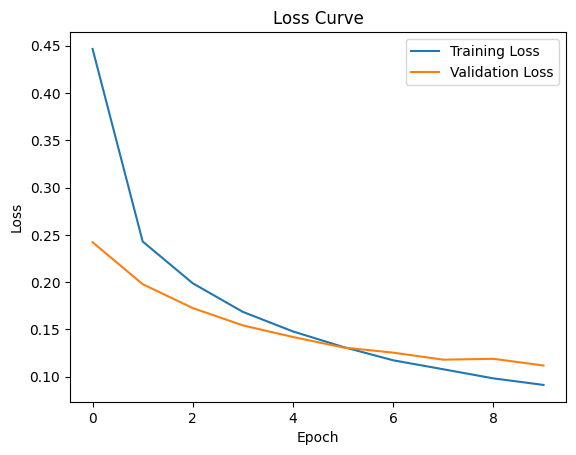

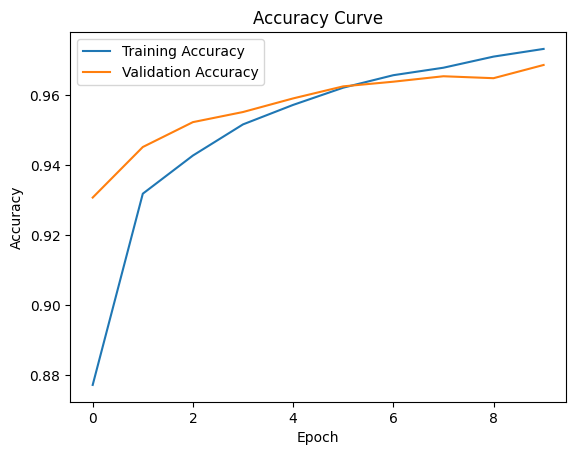

In [ ]:
# plot the loss and accuracy
plt.title("Loss Curve")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

plt.title("Accuracy Curve")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_x, test_y)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9674
Test Loss: 0.11356817930936813
Test Accuracy: 0.9674000144004822
